**ML ASSIGNMENT 1**

##Preprocessing data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
header_names = ['YEAR','Rainfall in June']
data = files.upload()
given = pd.read_csv(io.BytesIO(data["data.csv"]))

Saving data.csv to data.csv


##Dataset



In [ ]:
print("Number of rows: ",len(given))
given

Number of rows:  115


,YEAR,Rainfall in June
0,1901,22.7
1,1902,59.9
2,1903,26.2
3,1904,53.4
4,1905,23.1
...,...,...
112,2011,119.5
113,2012,21.7
114,2013,155.0
115,2014,31.3


###Descriptive statistics of data

In [ ]:
descriptive_stats = given.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats[['Rainfall in June']])
#50% == Median


Descriptive Statistics:
       Rainfall in June
count        115.000000
mean          72.178261
std           35.077895
min           17.700000
25%           48.650000
50%           68.800000
75%           88.250000
max          161.000000


###Imputing Median of Data in empty places

###Drop duplicate rows

In [ ]:
given.drop_duplicates(inplace=True)

In [ ]:
given

,YEAR,Rainfall in June
0,1901,22.7
1,1902,59.9
2,1903,26.2
3,1904,53.4
4,1905,23.1
...,...,...
112,2011,119.5
113,2012,21.7
114,2013,155.0
115,2014,31.3


In [ ]:
given.fillna(given["Rainfall in June"].median(), inplace= True)

In [ ]:
given

,YEAR,Rainfall in June
0,1901,22.7
1,1902,59.9
2,1903,26.2
3,1904,53.4
4,1905,23.1
...,...,...
112,2011,119.5
113,2012,21.7
114,2013,155.0
115,2014,31.3


###Histogram Plot

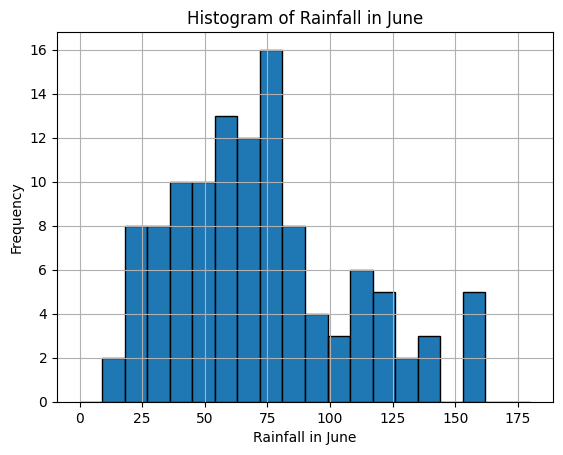

In [ ]:
plt.hist(given["Rainfall in June"].dropna(), bins=20, range=(0, 180), edgecolor='black')
plt.title('Histogram of Rainfall in June')
plt.xlabel('Rainfall in June')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Verify the behavior by comparing Mean with Median
mean_value = given['Rainfall in June'].mean()
median_value = given["Rainfall in June"].median()

print(f"\nMean: {mean_value}")
print(f"Median: {median_value}")
if mean_value == median_value:
    print('The data distribution is symmetric.')
elif mean_value < median_value:
    print('The data distribution is skewed to the left.')
else:
    print('The data distribution is skewed to the right.')


Mean: 72.17826086956522
Median: 68.8
The data distribution is skewed to the right.


In [ ]:
scalerstandard = StandardScaler()
scalerminmax = MinMaxScaler()

data_standard_scaled = scaler_standard.fit_transform(given[['Rainfall in June']])
data_minmax_scaled = scaler_minmax.fit_transform(given[['Rainfall in June']])

print("\nStandard Scaled Data:")
print(data_standard_scaled)
print("\nMin-Max Scaled Data:")
print(data_minmax_scaled)


Standard Scaled Data:
[[-1.41669837]
 [-0.3515603 ]
 [-1.31648377]
 [-0.53767313]
 [-1.40524527]
 [ 0.56182423]
 [-0.88126606]
 [-0.88985588]
 [ 1.51243133]
 [ 1.2805061 ]
 [ 0.16669237]
 [-1.1561404 ]
 [ 1.37499416]
 [ 0.08938396]
 [-0.50617711]
 [ 1.72145036]
 [ 1.884657  ]
 [-0.09672888]
 [-0.83831694]
 [ 0.29840299]
 [ 0.13233307]
 [ 0.02066537]
 [-1.40810855]
 [-1.50545987]
 [ 2.01350434]
 [-1.55986209]
 [-0.94998464]
 [-0.66652048]
 [-0.06523286]
 [-0.26566207]
 [-1.55413554]
 [-0.95284792]
 [ 1.77012602]
 [ 0.82810875]
 [-1.20767934]
 [ 2.45158532]
 [-0.03946339]
 [ 2.3427809 ]
 [ 0.31844591]
 [-0.15113109]
 [ 0.17528219]
 [-0.19694348]
 [-0.67797358]
 [-0.26852534]
 [-0.31720101]
 [ 0.57041405]
 [-1.00438686]
 [-0.83831694]
 [-0.95571119]
 [-0.53480986]
 [-0.66938375]
 [ 1.28336937]
 [ 0.59332025]
 [-1.06451562]
 [ 0.13519635]
 [ 0.30412954]
 [-0.43459526]
 [-1.04160942]
 [-1.21913244]
 [-0.66079393]
 [ 0.35566847]
 [-0.84404349]
 [-0.40596251]
 [-0.57203243]
 [-1.43387802]
 [

In [ ]:
# Print the range of scaled data
print(f"Standard Scaling Range: {data_standard_scaled.min()} to {data_standard_scaled.max()}")
print(f"Min-Max Scaling Range: {data_minmax_scaled.min()} to {data_minmax_scaled.max()}")

Standard Scaling Range: -1.5598620882449903 to 2.543210103811405
Min-Max Scaling Range: 0.0 to 0.9999999999999999


###Linear Regression Model

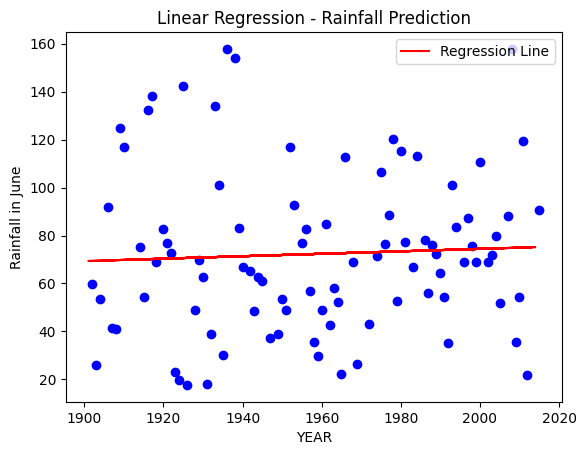

In [ ]:
X = given[['YEAR']]
y = given[['Rainfall in June']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Build a Linear Regression model
model = LinearRegression().fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
plt.scatter(X_train, y_train,color='b')
plt.plot(X_test, y_pred, color='r', label='Regression Line')
plt.title('Linear Regression - Rainfall Prediction')
plt.xlabel('YEAR')
plt.ylabel('Rainfall in June')
plt.legend()
plt.show()

In [ ]:
X = given[['YEAR']]
y = data_standard_scaled

####Split the data into training and testing sets (80-20 rule)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression Model

In [ ]:
# Build a Linear Regression model
model = LinearRegression().fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)

MAE, MSE and RMSE (80 - 20 split)

In [ ]:
# Evaluate the model using MAE, MSE, and RMSE
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
# Print the evaluation metrics
print(f"Mean Absolute Error (MAE) of the test data: {mae}")
print(f"Mean Squared Error (MSE) of the test data: {mse}")
print(f"Root Mean Squared Error (RMSE) of the test data: {rmse}")

Mean Absolute Error (MAE) of the test data: 0.9193815951276435
Mean Squared Error (MSE) of the test data: 1.2843533472433972
Root Mean Squared Error (RMSE) of the test data: 1.1332931426790676


####Split the data into training and testing sets (70-30 rule)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model using MAE, MSE, and RMSE
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE) of the test data: {mae}")
print(f"Mean Squared Error (MSE) of the test data: {mse}")
print(f"Root Mean Squared Error (RMSE) of the test data: {rmse}")

Mean Absolute Error (MAE) of the test data: 0.922774824424791
Mean Squared Error (MSE) of the test data: 1.2182150893704684
Root Mean Squared Error (RMSE) of the test data: 1.1037278148939023


###Linear Regression (MiniMax scaled using 80-20 split)

In [ ]:
X = given[['YEAR']]
y = data_minmax_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Build a Linear Regression model
model = LinearRegression().fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model using MAE, MSE, and RMSE
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Print the evaluation metrics
print(f"Mean Absolute Error (MAE) of the test data: {mae}")
print(f"Mean Squared Error (MSE) of the test data: {mse}")
print(f"Root Mean Squared Error (RMSE) of the test data: {rmse}")

Mean Absolute Error (MAE) of the test data: 0.22407151326939329
Mean Squared Error (MSE) of the test data: 0.07628975238955875
Root Mean Squared Error (RMSE) of the test data: 0.27620599629544385
